In [1]:
import sys
sys.path.insert(0, '..')
from eda_import import *
import pysam

In [2]:
%time adf = pd.read_csv('../__results/annotated-clv-sc-mapping-all-genes.csv')

CPU times: user 224 ms, sys: 32.8 ms, total: 256 ms
Wall time: 257 ms


In [3]:
adf.head()

,gene_name,gene_id,transcript_id,seqname,source,sc,clv,strand,gene_source,transcript_source,is_cds_end_NF,is_cds_start_NF,utr_beg,cluster_idx,mclv
0,TSPAN6,ENSG00000000003,ENST00000373020,X,protein_coding,99885795,99883667,-,ensembl_havana,ensembl_havana,False,False,99885794,1,99883667
1,TNMD,ENSG00000000005,ENST00000373031,X,protein_coding,99854714,99854882,+,ensembl_havana,ensembl_havana,False,False,99854715,1,99854882
2,DPM1,ENSG00000000419,ENST00000371582,20,protein_coding,49551669,49551404,-,ensembl_havana,havana,False,False,49551668,2,49551404
3,DPM1,ENSG00000000419,ENST00000371583,20,protein_coding,49551669,49551490,-,ensembl_havana,ensembl,False,False,49551668,1,49551485
4,DPM1,ENSG00000000419,ENST00000371584,20,protein_coding,49551669,49551481,-,ensembl_havana,havana,False,True,49551668,1,49551485


In [4]:
adf.source.value_counts()

protein_coding             68388
nonsense_mediated_decay    13794
Name: source, dtype: int64

In [5]:
adf.shape

(82182, 15)

In [6]:
adf.gene_id.unique().shape

(22563,)

# How many stop codons a gene may have

In [7]:
%time sc_per_gene = adf.groupby(['seqname', 'gene_id', 'gene_name']).apply(lambda g: g.sc.unique().shape[0])

CPU times: user 2.67 s, sys: 22.3 ms, total: 2.69 s
Wall time: 2.68 s


In [8]:
sc_per_gene.head()

seqname  gene_id          gene_name
1        ENSG00000000457  SCYL3        1
         ENSG00000000460  C1orf112     3
         ENSG00000000938  FGR          1
         ENSG00000000971  CFH          2
         ENSG00000001460  STPG1        3
dtype: int64

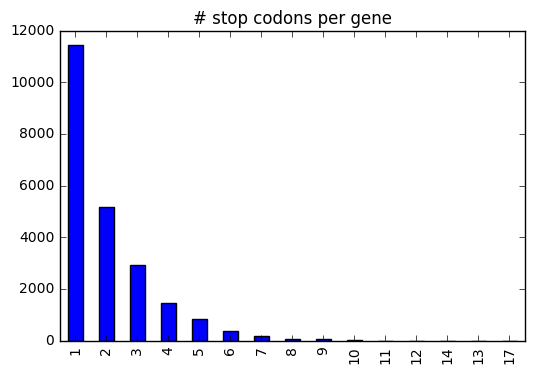

In [9]:
ax = sc_per_gene.value_counts().plot.bar()
ax.set_title('# stop codons per gene')

In [16]:
sc_per_gene[sc_per_gene == 17]

seqname  gene_id          gene_name
16       ENSG00000187741  FANCA        17
dtype: int64

In [25]:
np.sort(adf.query('gene_id == "ENSG00000187741"').sc.unique())

array([89805009, 89805106, 89805162, 89807244, 89815071, 89816301,
       89829154, 89829189, 89836241, 89844765, 89858949, 89865466,
       89865487, 89865516, 89866036, 89877404, 89882547])

In [26]:
np.diff(np.sort(adf.query('gene_id == "ENSG00000187741"').sc.unique()))

array([   97,    56,  2082,  7827,  1230, 12853,    35,  7052,  8524,
       14184,  6517,    21,    29,   520, 11368,  5143])

# How CSs a gene may have

In [10]:
%time clv_per_gene = adf.groupby(['seqname', 'gene_id', 'gene_name']).apply(lambda g: g.mclv.unique().shape[0])

CPU times: user 2.54 s, sys: 18.9 ms, total: 2.56 s
Wall time: 2.55 s


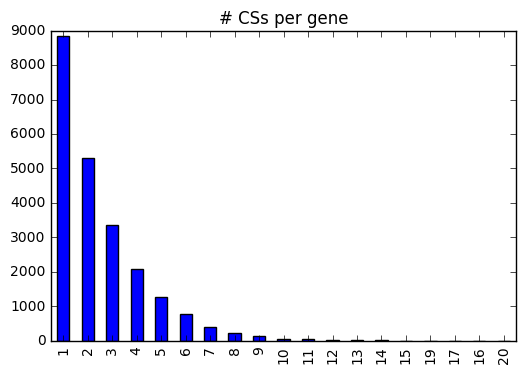

In [11]:
ax = clv_per_gene.value_counts().plot.bar()
ax.set_title('# CSs per gene')

In [17]:
clv_per_gene[clv_per_gene == 20]

seqname  gene_id          gene_name
19       ENSG00000099622  CIRBP        20
dtype: int64

# How many CSs correspond to multiple stop codons

In [12]:
%time sc_per_cs = adf.groupby(['seqname', 'gene_id', 'gene_name', 'mclv']).apply(lambda g: g.sc.unique().shape[0])

CPU times: user 6.52 s, sys: 269 ms, total: 6.79 s
Wall time: 6.54 s


In [13]:
sc_per_cs.value_counts()

1     51113
2     4517 
3     797  
4     180  
5     41   
6     9    
8     3    
10    1    
7     1    
dtype: int64

In [14]:
# in terms of fraction
sc_per_cs.value_counts() / sc_per_cs.value_counts().sum()

1     0.902068
2     0.079718
3     0.014066
4     0.003177
5     0.000724
6     0.000159
8     0.000053
10    0.000018
7     0.000018
dtype: float64

So the majority uses 1 stop codon, ~8% correspond to two stop codons, which is very onsistent with the analysis from the subset genes, https://github.com/bcgsc/tasrkleat-TCGA-analysis-scripts/blob/master/analysis-notebooks/core/diff-APA-analysis.ipynb

Check a few concrete ones

In [15]:
sc_per_cs[sc_per_cs == 10]

seqname  gene_id          gene_name  mclv    
1        ENSG00000126091  ST3GAL3    44395893    10
dtype: int64